## Libraries

- BeautifulSoup

Extracts data from HTML and XML documents. Detects encoding and handles HTML documents with special characters. We can navigate a parsed document and find what we need which makes it quick and painless to extract the data from the webpages. In this course, we will learn how to build web scrapers using Beautiful Soup in detail.

- Scrapy

Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from wewbsites, process them as you want, and store them in your preferred structure and format.

- Selenium

Tool for automatin browsers. It's primarily usd for testing in the industry but is also very handy for web scraping.

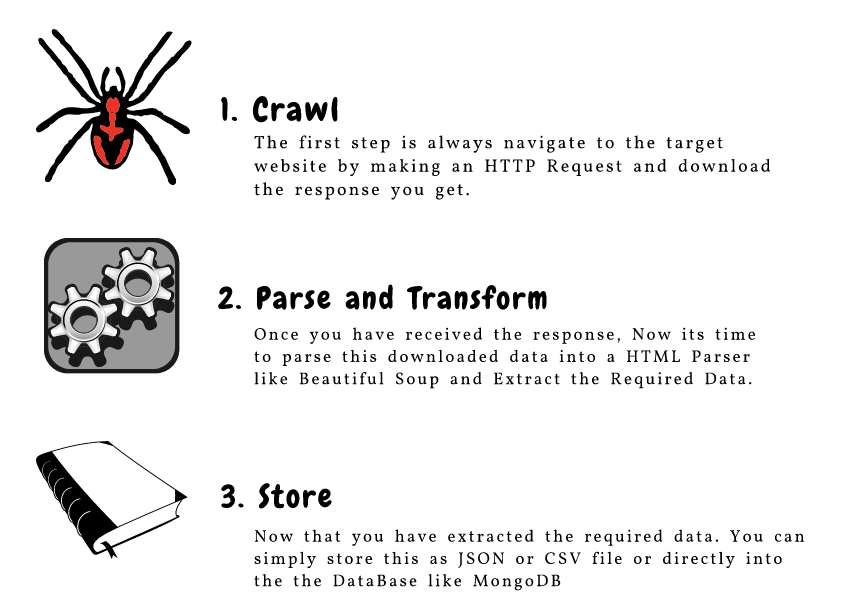

Always follow the robots.txt file of the target website which is also known as the robot exclusion protocol. This tells web robots which pages not to crawl. Indica a los robots de búsquedas a qué páginas del sitio no pueden entrar. Ejemplo https://www.goibibo.com/robots.txt

Most websites don’t need a robots.txt file. That’s because Google can usually find and index all of the important pages on your site.

And they’ll automatically NOT index pages that aren’t important or duplicate versions of other pages. That said, there are 3 main reasons that you’d want to use a robots.txt file.

**Block Non-Public Pages, Maximize Crawl Budget and prevent indexing of resources.**

https://backlinko.com/hub/seo/robots-txt

*1) Crawl*

Navigate to the target website and download the source code of the web page. We use **request** library to do this.

In [1]:
# Importing libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [2]:
# target url to scrap

url = 'https://www.goibibo.com/hotels/hotels-in-shimla-ct/'

- Header

Well, when you’re sending a request to a server you’re not just saying: ‘Hey, give me that info, please’. You are also providing information about the request itself – information, such as the encoding and language of the expected response, the length and type of data provided, who is making the request and so on. These pieces of information, referred to as headers, are intended to make communications on the web easier and more reliable, as the server has a better idea of how to respond.

**User - agent string of chrome: Google search**

In [3]:
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
    }

In [4]:
# Send request to download the data

req = requests.get(url, headers = headers) # Get is used for viewing without changing
req

<Response [200]>

Response 200: OK

In [5]:
# parse the downloaded data

soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   var starttime = new Date();
  </script>
  <title data-react-helmet="true">
   Hotels in Shimla Book from 529 hotels
  </title>
  <meta content="#2d67b2" data-react-helmet="true" name="theme-color"/>
  <meta content="122023101161980" data-react-helmet="true" property="fb:app_id"/>
  <meta content="239522418693" data-react-helmet="true" property="fb:pages"/>
  <meta content="l3rQIge7B2N_G1cQl0VZP0y7-nE" data-react-helmet="true" name="alexaVerifyID"/>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, user-scalable=0" data-react-helmet="true" name="viewport"/>
  <meta content="Book Hotels in Shimla at lowest Prices on Goibibo. Get Free Cancellation and Instant Refund on 529  Shimla Hotels starting from  ₹1040. Book from 46 goSafe Hotels in Shimla, ensuring clean and safe hotel stay in current Coronavirus scenario. Use code GETSETGO for discounts upto 30% off on 

*2) Pass data to HTML Parser with particular objects*

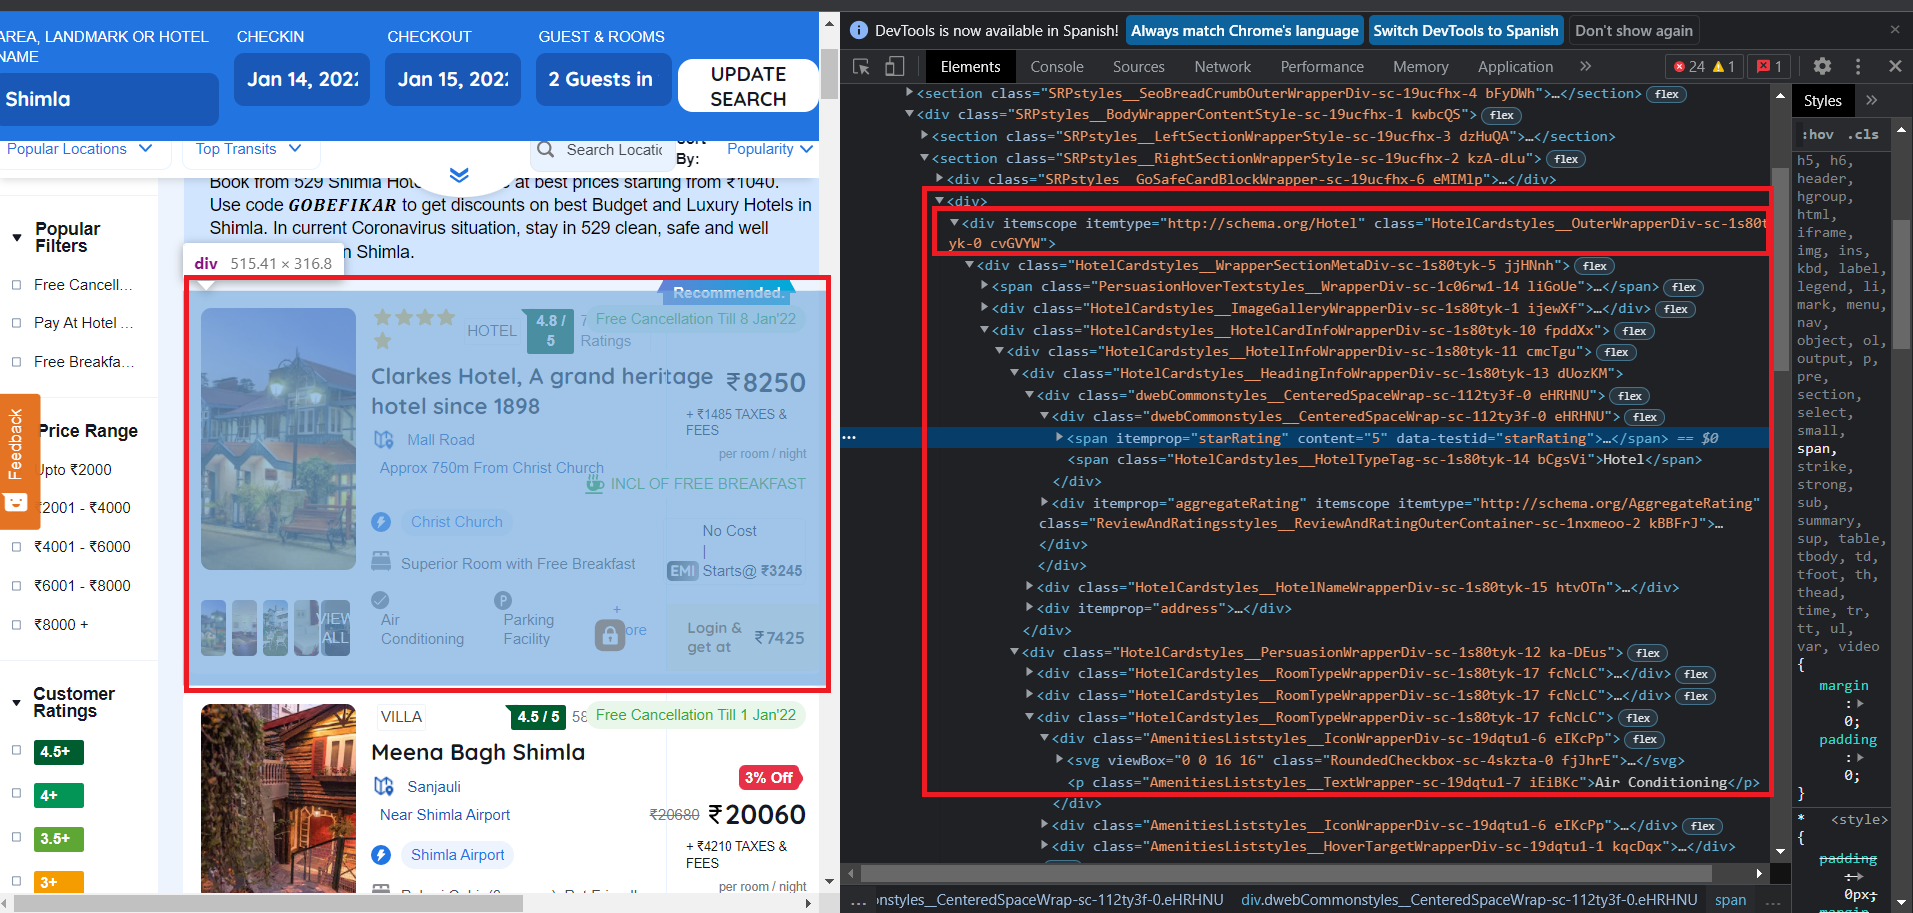

In [6]:
#find all the section with specified class (check in the source code if all the other elements are the same)

Needed_data = soup.find_all('div', attrs = {'class', 'HotelCardstyles__OuterWrapperDiv-sc-1s80tyk-0 cvGVYW'})

In [7]:
# total number of elements
print('Total number of elements found : ', len(Needed_data))

Total number of elements found :  10


In [8]:
# Source code of elements
for element in Needed_data:
    print(str(element) + 10*'------------------------------------------------------------')

<div class="HotelCardstyles__OuterWrapperDiv-sc-1s80tyk-0 cvGVYW" itemscope="" itemtype="http://schema.org/Hotel"><div class="HotelCardstyles__WrapperSectionMetaDiv-sc-1s80tyk-5 jjHNnh"><span class="PersuasionHoverTextstyles__WrapperDiv-sc-1c06rw1-14 liGoUe"><span class="PersuasionHoverTextstyles__HoverTargetWrapperDiv-sc-1c06rw1-2 gKuLse" type=""><div class="HotelCardDealTag__WrapperDiv-sc-8faxgn-0 hLCRNy" color="#ffffff"><div class="HotelCardDealTag__TagMarkup-sc-8faxgn-2 eGoFUf"></div><span class="HotelCardDealTag__TextWrapperSpan-sc-8faxgn-1 iEPEvg">Recommended.</span></div><div class="PersuasionHoverTextstyles__HiddenDropdownWrapperDiv-sc-1c06rw1-1 bfyAjt persuasion-hover" direction="bottom"><div class="PersuasionHoverTextstyles__TopDiv-sc-1c06rw1-3 bCAqCK"><div class="Layouts__Column-sc-1yzlivq-1 PersuasionHoverTextstyles__TextBlockDropDownWrapper-sc-1c06rw1-8 dCwuGE Cdtcu" color="#141823"><div class="Layouts__Row-sc-1yzlivq-0 PersuasionHoverTextstyles__TextBlockDDHeading-sc-1c06

In [14]:
# Selecting only hotel names

#find all the section with specified class (check in the source code if all the other elements are the same)

Hotel_names = soup.find_all('div', attrs = {'class', 'HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn'})

# total number of elements
print('Total number of elements found : ', len(Hotel_names))

# Source code of elements
for element in Hotel_names:
    print(str(element) + 5*'------------------------------------------------------------')

Total number of elements found :  10
<div class="HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn"><a class="HotelCardstyles__HotelNameSeoAnchor-sc-1s80tyk-16 eUMfTF" content="Clarkes Hotel, A grand heritage hotel since 1898" href="/hotels/clarkes-a-grand-heritage-since-1898-hotel-in-shimla-6919002552374671737/" itemprop="name" target="_blank"><span>Clarkes Hotel, A grand heritage hotel since 1898</span></a></div>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<div class="HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-15 htvOTn"><a class="HotelCardstyles__HotelNameSeoAnchor-sc-1s80tyk-16 eUMfTF" content="Meena Bagh Shimla" href="/hotels/meena-bagh-shimla-hotel-in-shimla-1769649039584828409/" itemprop="name" target="_blank"><spa

In [16]:
# Selecting only pricehotel names

#find all the section with specified class (check in the source code if all the other elements are the same)

price = soup.find_all('div', attrs = {'class', 'HotelCardstyles__CurrentPriceTextWrapper-sc-1s80tyk-30 daRNvo'})

# total number of elements
print('Total number of elements found : ', len(price))

# Source code of elements
for element in price:
    print(str(element) + 5*'------------------------------------------------------------')

Total number of elements found :  10
<div class="HotelCardstyles__CurrentPriceTextWrapper-sc-1s80tyk-30 daRNvo"><svg class="RupeeIcon-sc-5hlwf0-0 bendgm" fill="" height="1.5rem" viewbox="0 0 32 32" width="1.5rem" xmlns="http://www.w3.org/2000/svg"><path d="M21.482 7.945h3.536c.982 0 1.786.818 1.786 1.818s-.804 1.818-1.786 1.818h-3.536a9.429 9.429 0 01-2.625 5.109 9.509 9.509 0 01-6.75 2.891h-.679l9.661 9.255c0 .018.018.018.036.036.679.673.696 1.782.036 2.473a1.742 1.742 0 01-2.518.091L5.714 19a1.78 1.78 0 01-.554-1.364c.036-.964.839-1.727 1.786-1.691h5.179a5.902 5.902 0 004.214-1.836 6.327 6.327 0 001.482-2.527H6.946c-.982 0-1.786-.818-1.786-1.818s.804-1.818 1.786-1.818h10.875C17 5.455 14.714 3.782 12.125 3.764H6.946c-.982 0-1.786-.818-1.786-1.818S5.964.128 6.946.128h18.071c.982 0 1.786.818 1.786 1.818s-.804 1.818-1.804 1.818h-5.464a8.504 8.504 0 011.946 4.182z"></path></svg><p class="HotelCardstyles__CurrentPrice-sc-1s80tyk-31 hBNuAQ" itemprop="priceRange">8250</p></div>--------------